In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Data/Sleep_health_and_lifestyle.csv'
dataBase = pd.read_csv(file_path)

dataBase.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,none
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


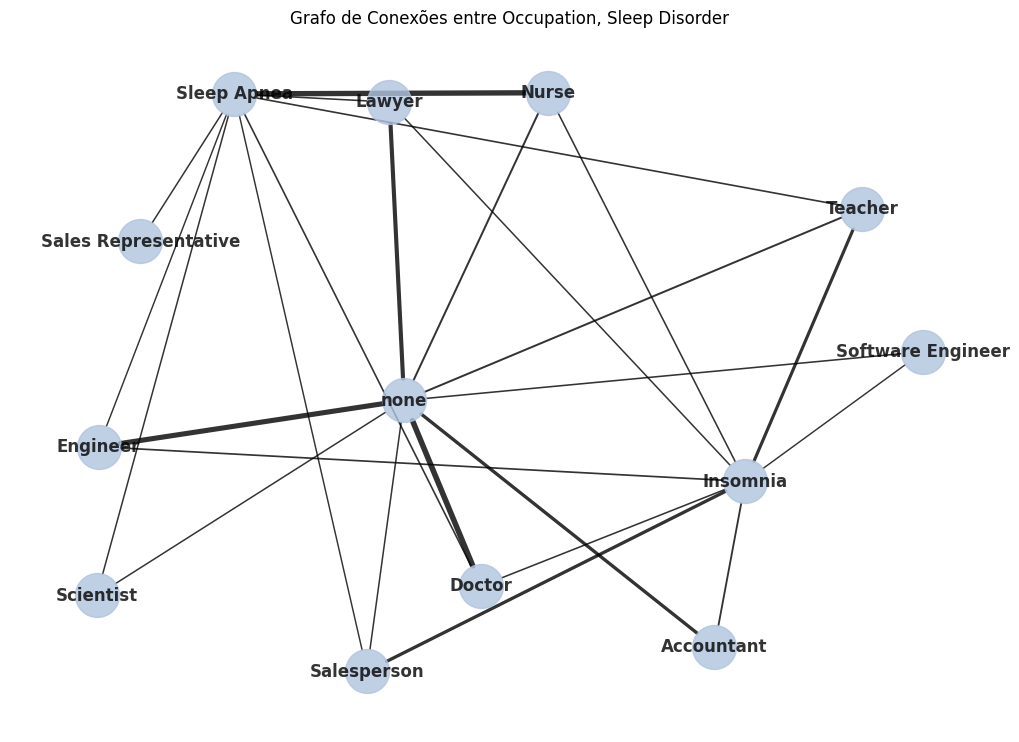

In [2]:
#Grafo de ocupação com disturbio do sono
Grafo1 = nx.Graph()

Grafo1.add_nodes_from(dataBase['Occupation'])
Grafo1.add_nodes_from(dataBase['Sleep Disorder'])

edgesCount1 = {}

for edge in zip(dataBase['Occupation'], dataBase['Sleep Disorder']):
    edgesCount1[edge] = edgesCount1.get(edge, 0) + 1

for edge, count in edgesCount1.items():
    Grafo1.add_edge(edge[0], edge[1], weight=count)

edge_weights = [Grafo1[u][v]['weight'] for u, v in Grafo1.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(10, 7))
pos = nx.fruchterman_reingold_layout(Grafo1, k=5)
nx.draw(Grafo1, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8,width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(Grafo1, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder')
plt.show()


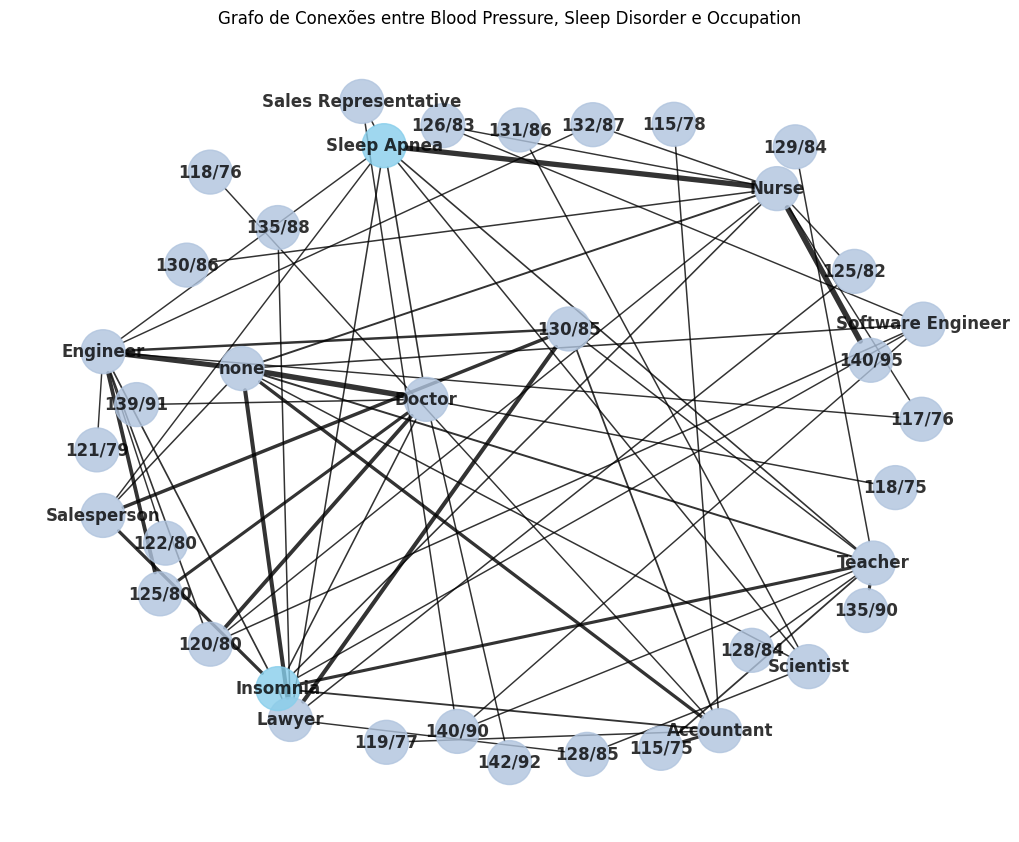

In [3]:
#Disturbios e pressão com ocupação
G = nx.Graph()

edges = list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))
edges += list(zip(dataBase['Occupation'], dataBase['Blood Pressure']))

G.add_nodes_from(dataBase['Occupation'])
G.add_nodes_from(dataBase['Sleep Disorder'])
G.add_nodes_from(dataBase['Blood Pressure'])

edge_count2 = {}
for edge in edges:
    edge_count2[edge] = edge_count2.get(edge, 0) + 1

for edge, count in edge_count2.items():
    G.add_edge(edge[0], edge[1], weight=count)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(10, 8))
pos = nx.fruchterman_reingold_layout(G, k=5)
node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'None'] else 'lightsteelblue' for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=12, alpha=0.8, width=edge_widths, edge_color='black', arrows=True)
plt.title('Grafo de Conexões entre Blood Pressure, Sleep Disorder e Occupation')
plt.show()


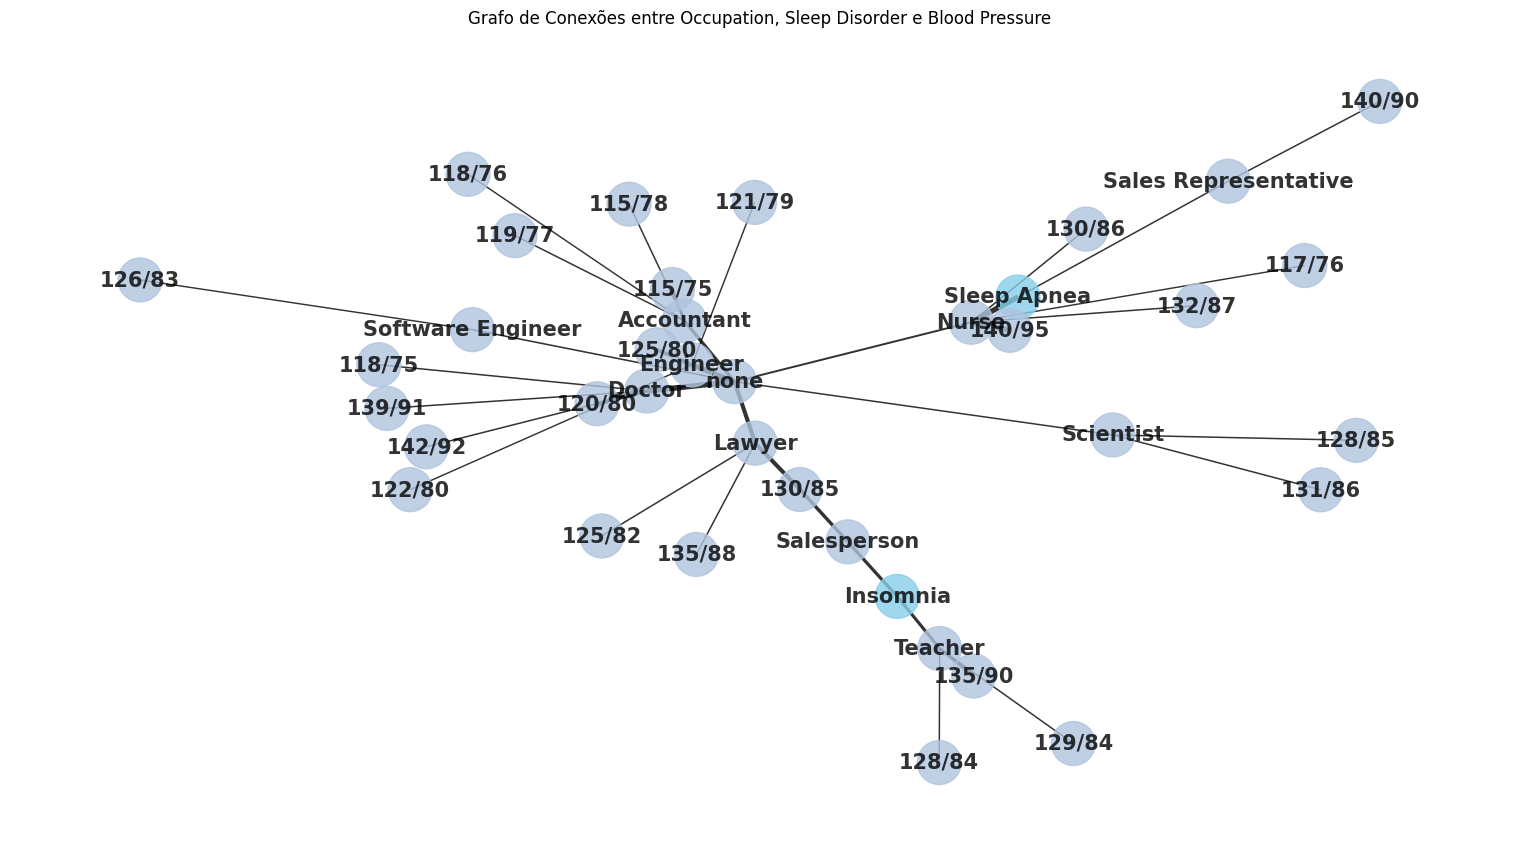

In [4]:
# Arvore geradora maxima
G = nx.Graph()

edges = list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))
edges += list(zip(dataBase['Occupation'], dataBase['Blood Pressure']))

G.add_nodes_from(dataBase['Occupation'])
G.add_nodes_from(dataBase['Sleep Disorder'])
G.add_nodes_from(dataBase['Blood Pressure'])

edge_count2 = {}
# Adiciona pesos às arestas
for edge in edges:
    edge_count2[edge] = edge_count2.get(edge, 0) + 1

for edge, count in edge_count2.items():
    G.add_edge(edge[0], edge[1], weight=count)


# Criação da árvore maxima de abrangência
tree = nx.maximum_spanning_tree(G, weight='weight', algorithm='kruskal')


# Visualização da MST
edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'None'] else 'lightsteelblue' for node in tree.nodes()]
plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(tree, k=7)
nx.draw(tree, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Blood Pressure')
plt.show()


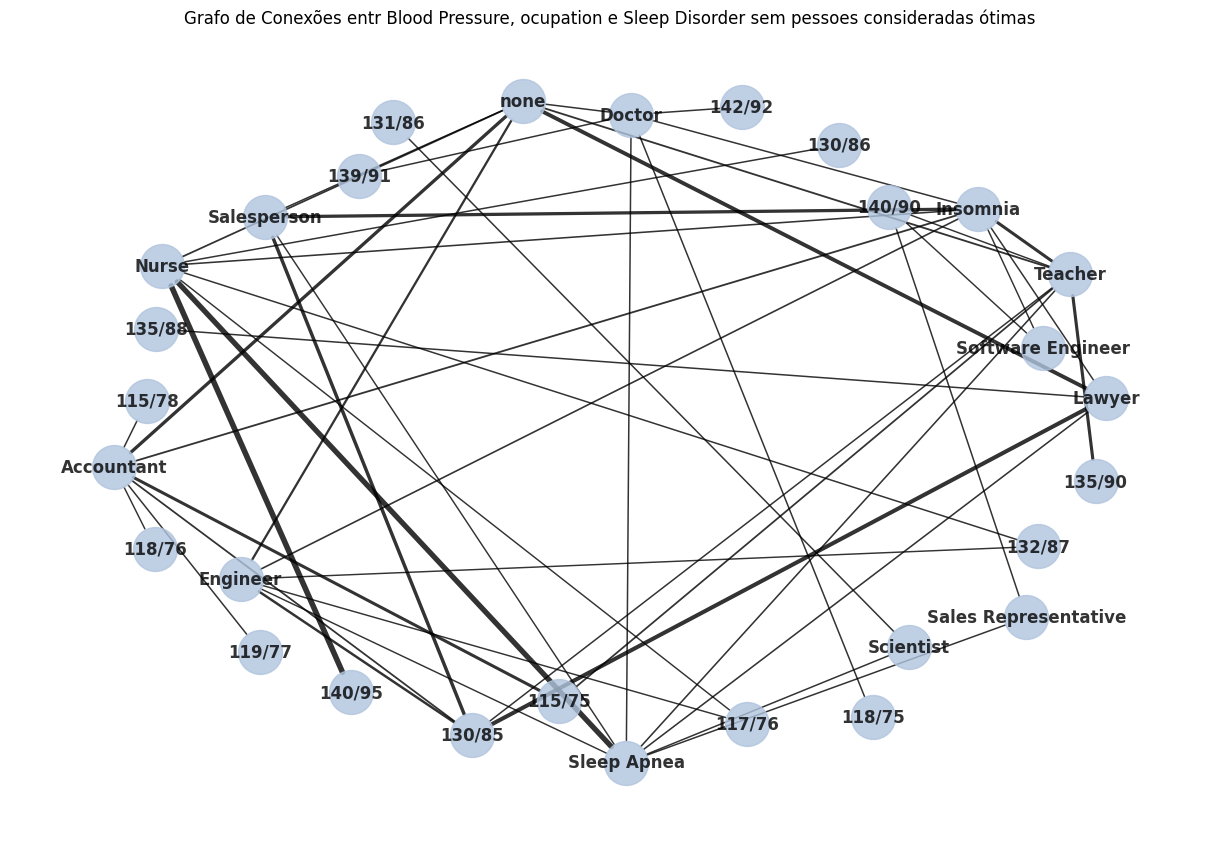

In [5]:
#Sem pressão 120/80
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Data/SemPressaoNormal.csv'
SemPressaoPadrao = pd.read_csv(file_path)
G = nx.Graph()

edges = list(zip(SemPressaoPadrao['Occupation'], SemPressaoPadrao['Sleep Disorder']))
edges += list(zip(SemPressaoPadrao['Occupation'], SemPressaoPadrao['Blood Pressure']))

G.add_nodes_from(SemPressaoPadrao['Occupation'])
G.add_nodes_from(SemPressaoPadrao['Sleep Disorder'])
G.add_nodes_from(SemPressaoPadrao['Blood Pressure'])

edge_count = {}
for edge in edges:
    edge_count[edge] = edge_count.get(edge, 0) + 1

for edge, count in edge_count.items():
    G.add_edge(edge[0], edge[1], weight=count)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(G, k=10)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8, width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entr Blood Pressure, ocupation e Sleep Disorder sem pessoes consideradas ótimas')
plt.show()


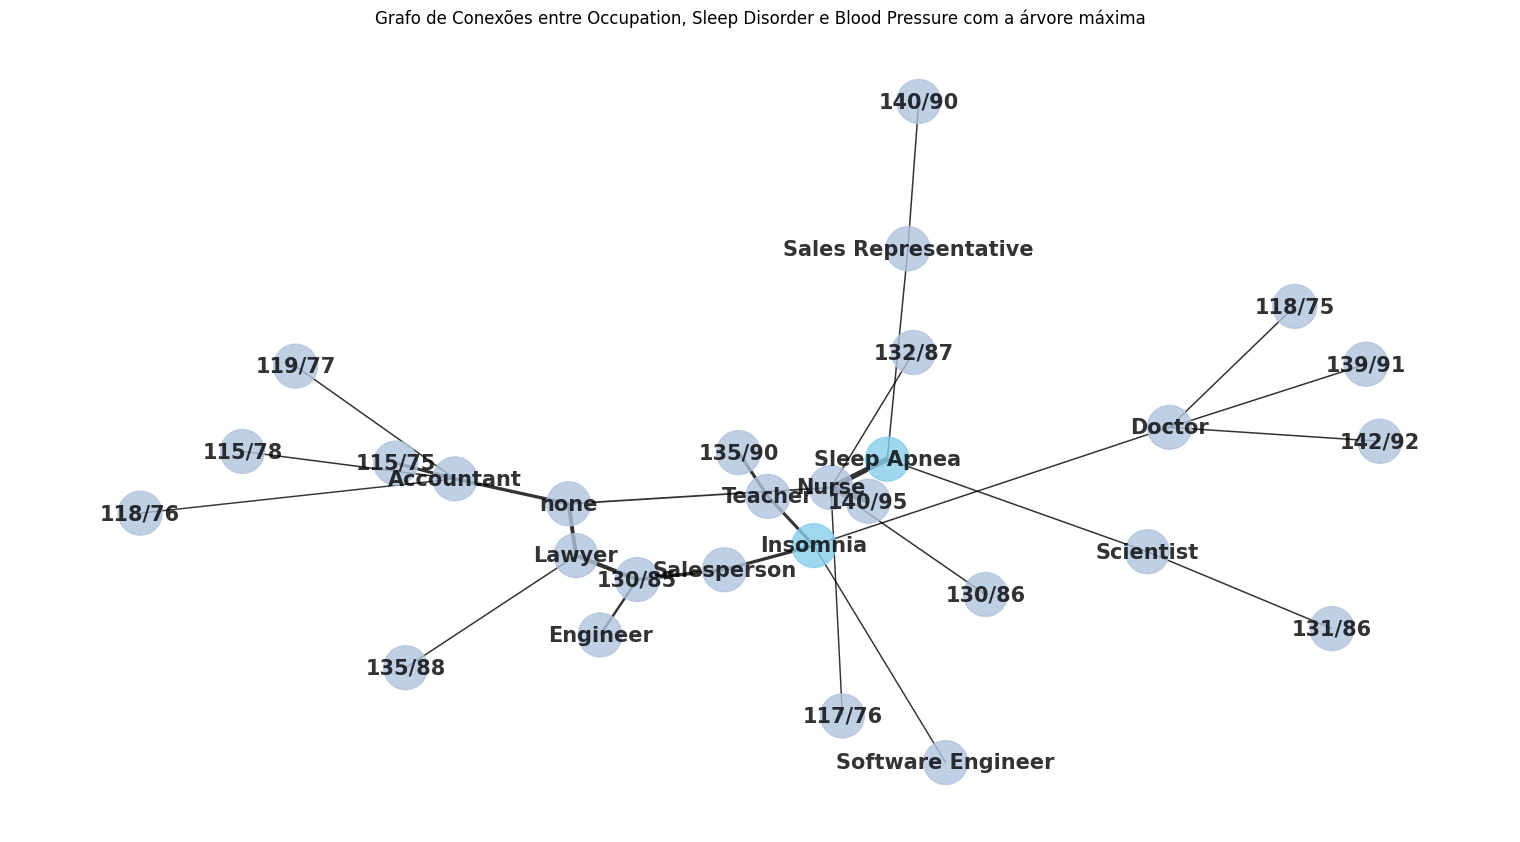

In [6]:
#Arvore sem pressoes 120/80
G = nx.Graph()

edges = list(zip(SemPressaoPadrao ['Occupation'], SemPressaoPadrao ['Sleep Disorder']))
edges += list(zip(SemPressaoPadrao ['Occupation'], SemPressaoPadrao ['Blood Pressure']))

G.add_nodes_from(SemPressaoPadrao ['Occupation'])
G.add_nodes_from(SemPressaoPadrao ['Sleep Disorder'])
G.add_nodes_from(SemPressaoPadrao ['Blood Pressure'])

edge_count = {}
for edge in edges:
    edge_count[edge] = edge_count.get(edge, 0) + 1

for edge, count in edge_count.items():
    G.add_edge(edge[0], edge[1], weight=count)

tree = nx.maximum_spanning_tree(G, algorithm='kruskal')

edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(tree, k=5)

node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'None'] else 'lightsteelblue' for node in G.nodes()]
nx.draw(tree, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Blood Pressure com a árvore máxima')
plt.show()


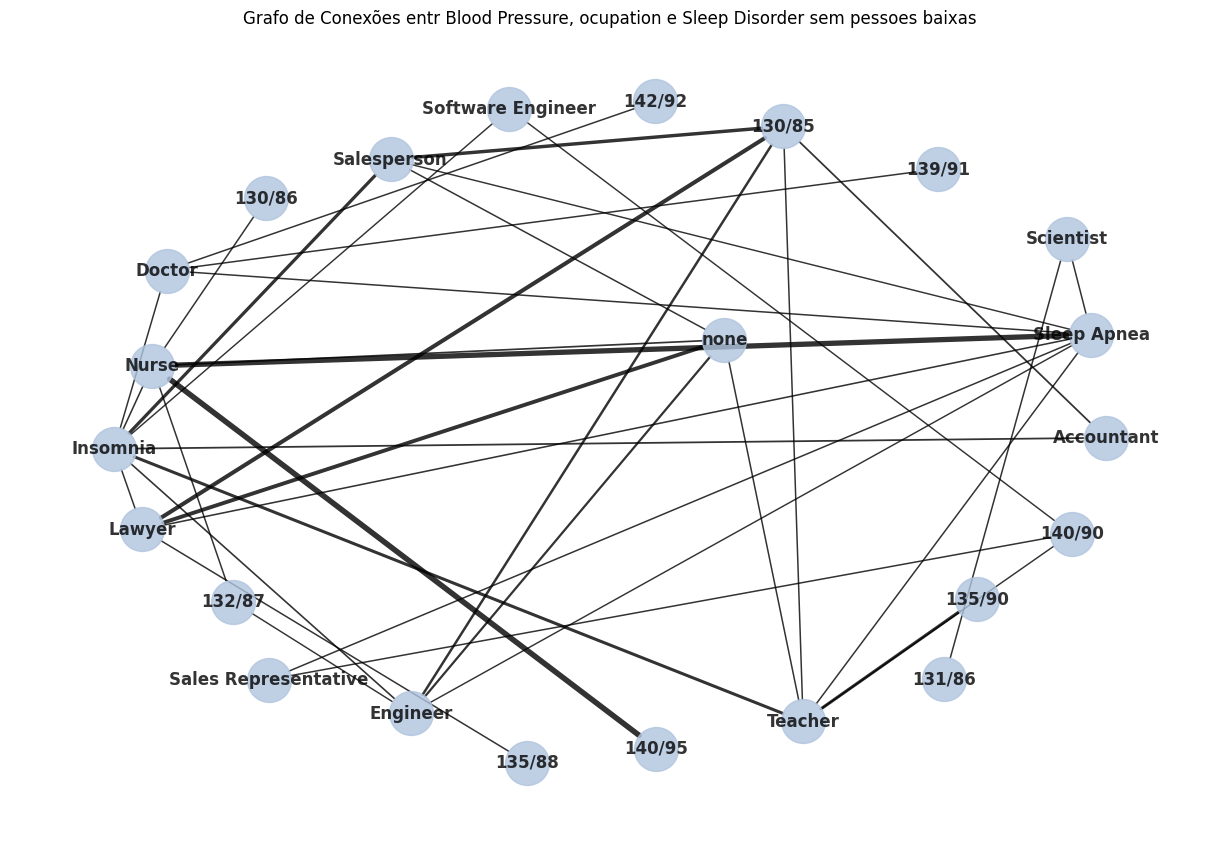

In [7]:
#Sem as pressoes baixas
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Data/SemPressaoBaixa.csv'
SemPressaoBaixa = pd.read_csv(file_path)
G = nx.Graph()

edges = list(zip(SemPressaoBaixa['Occupation'], SemPressaoBaixa['Sleep Disorder']))
edges += list(zip(SemPressaoBaixa['Occupation'], SemPressaoBaixa['Blood Pressure']))

G.add_nodes_from(SemPressaoBaixa['Occupation'])
G.add_nodes_from(SemPressaoBaixa['Sleep Disorder'])
G.add_nodes_from(SemPressaoBaixa['Blood Pressure'])

edge_count = {}
for edge in edges:
    edge_count[edge] = edge_count.get(edge, 0) + 1

for edge, count in edge_count.items():
    G.add_edge(edge[0], edge[1], weight=count)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(G, k=10)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8,width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entr Blood Pressure, ocupation e Sleep Disorder sem pessoes baixas')
plt.show()


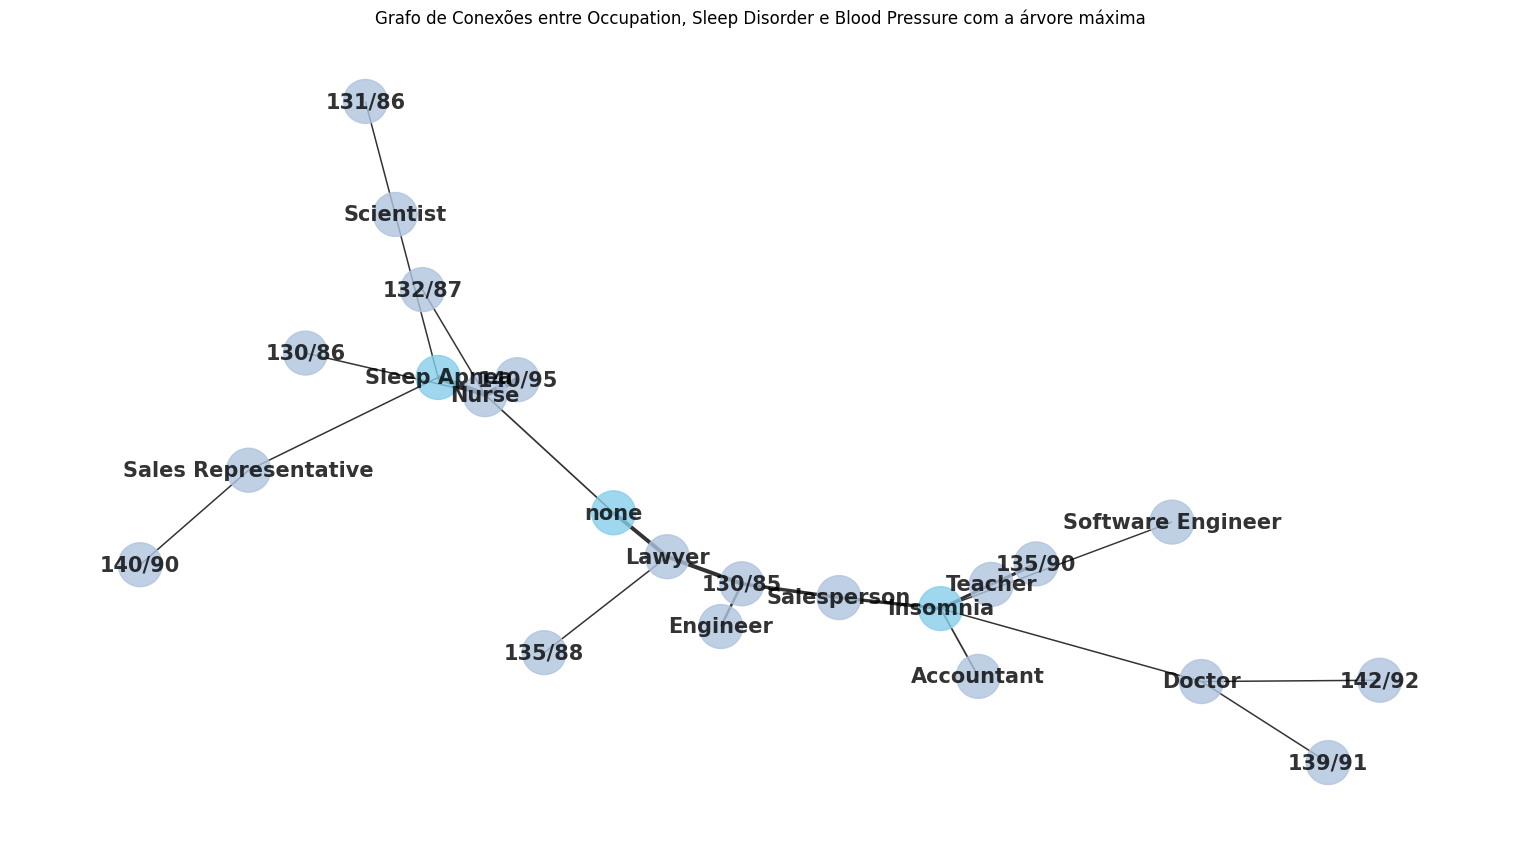

In [8]:
#Arvore sem pressoes baixas
G = nx.Graph()

edges = list(zip(SemPressaoBaixa ['Occupation'], SemPressaoBaixa ['Sleep Disorder']))
edges += list(zip(SemPressaoBaixa ['Occupation'], SemPressaoBaixa ['Blood Pressure']))

G.add_nodes_from(SemPressaoBaixa ['Occupation'])
G.add_nodes_from(SemPressaoBaixa ['Sleep Disorder'])
G.add_nodes_from(SemPressaoBaixa ['Blood Pressure'])

edge_count = {}
for edge in edges:
    edge_count[edge] = edge_count.get(edge, 0) + 1

for edge, count in edge_count.items():
    G.add_edge(edge[0], edge[1], weight=count)

tree = nx.maximum_spanning_tree(G, algorithm='kruskal')

edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(tree, k=7)
node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'none'] else 'lightsteelblue' for node in G.nodes()]
nx.draw(tree, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Blood Pressure com a árvore máxima')
plt.show()


In [26]:
#Media de sono por idade
sleep_duration=dataBase['Sleep Duration'].mean()
age = dataBase['Age'].mean()
print('Duração media do sono')
print(sleep_duration)
print('media das idades')
print(age)

Duração media do sono
7.132707774798928
media das idades
42.1769436997319


In [27]:
#Media de sono por idade
import scipy.stats as stats
from pandas._libs.tslibs.period import DIFFERENT_FREQ
df_male = dataBase[dataBase['Gender'] == 'Male']
df_female = dataBase[dataBase['Gender'] == 'Female']

mean_dur_male = df_male['Sleep Duration'].mean()
mean_dur_female = df_female['Sleep Duration'].mean()

t_statistic, p_value = stats.ttest_ind(df_male['Sleep Duration'], df_female['Sleep Duration'])

print("media do sono do homem: ",mean_dur_male)
print("media do sono damulher ", mean_dur_female)
print("estatistica: ", t_statistic)
print("p_value: ", p_value)

#Ele indica o quão grande é a diferença entre as médias das duas amostras em relação à variabilidade das amostras.
#Quanto maior o valor absoluto do t_statistic, maior a diferença entre as médias.

media do sono do homem:  7.036507936507937
media do sono damulher  7.231521739130434
estatistica:  -2.3784459522549817
p_value:  0.017891336818729852


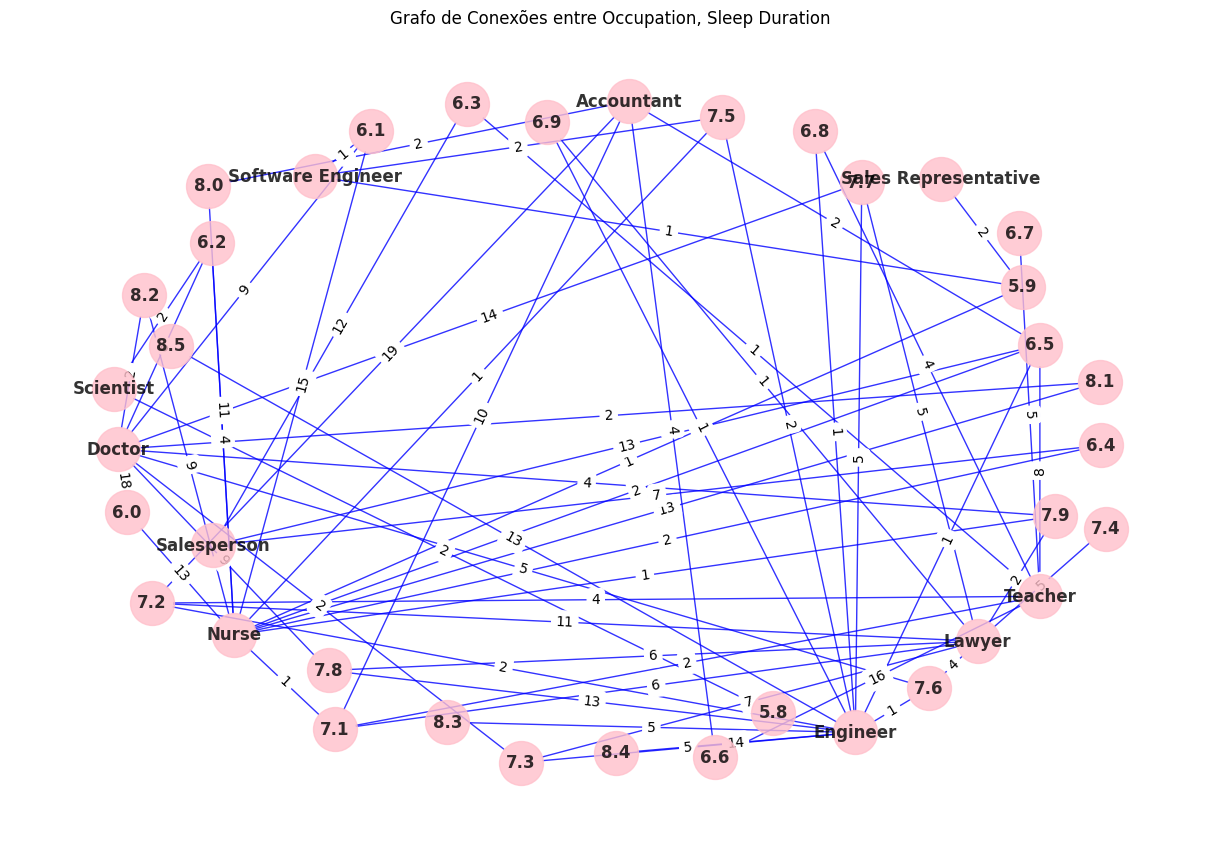

In [9]:
#Grafo tempo de sono
G = nx.Graph()

G.add_nodes_from(dataBase['Occupation'])
G.add_nodes_from(dataBase['Sleep Duration'])

edges_sleep_count = {}

for edge in zip(dataBase['Occupation'], dataBase['Sleep Duration']):
    edges_sleep_count[edge] = edges_sleep_count.get(edge, 0) + 1

for edge, count in edges_sleep_count.items():
    G.add_edge(edge[0], edge[1], weight=count)

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(G, k=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='pink', font_weight='bold', font_size=12, alpha=0.8, edge_color='blue', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Occupation, Sleep Duration')
plt.show()


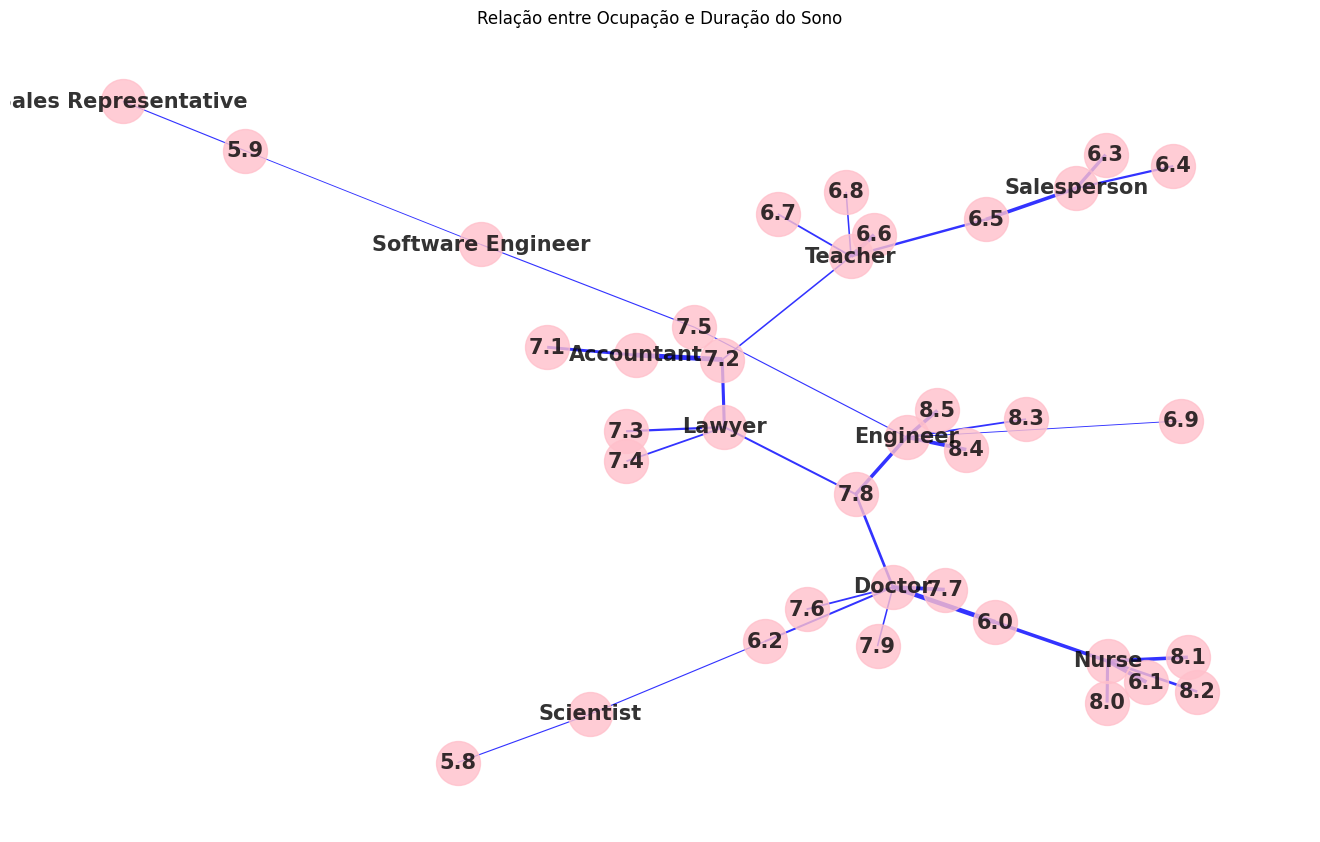

In [10]:
#Grafo tempo de sono por ocupação e arvore geradora maxima
G = nx.Graph()

occupation_sleep_count = dataBase.groupby(['Occupation', 'Sleep Duration']).size().reset_index(name='count')

G.add_nodes_from(dataBase['Occupation'])

for index, row in occupation_sleep_count.iterrows():
    G.add_edge(row['Occupation'], row['Sleep Duration'], weight=row['count'])

tree = nx.maximum_spanning_tree(G)

plt.figure(figsize=(13, 8))
pos = nx.spring_layout(tree)

edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [0.5 + 3 * (weight / max_weight) for weight in edge_weights]

nx.draw(tree, pos, with_labels=True, node_color='pink', node_size=1000, font_weight='bold', font_size=15,alpha=0.8, width=edge_widths, edge_color='blue', font_color='black')

plt.title('Relação entre Ocupação e Duração do Sono')
plt.show()

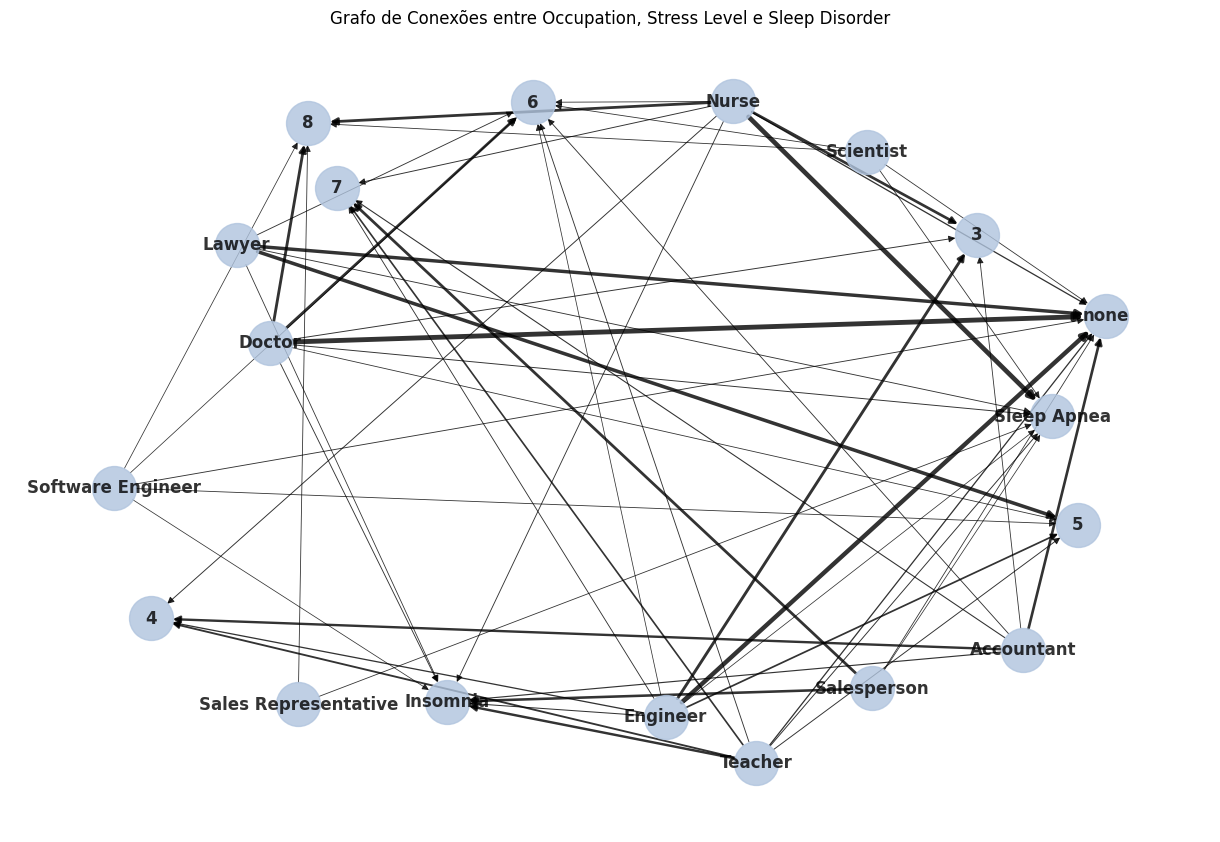

In [11]:
#Grafo de ocupação nivel de estresse e disturbio
G = nx.DiGraph()

G.add_nodes_from(dataBase['Occupation'])
G.add_nodes_from(dataBase['Stress Level'])
G.add_nodes_from(dataBase['Sleep Disorder'])

edges_occupation_stress_count = dataBase.groupby(['Occupation', 'Stress Level']).size().to_dict()
edges_occupation_disorder_count = dataBase.groupby(['Occupation', 'Sleep Disorder']).size().to_dict()

for (occupation, stress), count in edges_occupation_stress_count.items():
    G.add_edge(occupation, stress, weight=count)

for (occupation, disorder), count in edges_occupation_disorder_count.items():
    G.add_edge(occupation, disorder, weight=count)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
edge_widths = [0.5 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(G, k=8)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8, width=edge_widths,edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Occupation, Stress Level e Sleep Disorder')
plt.show()


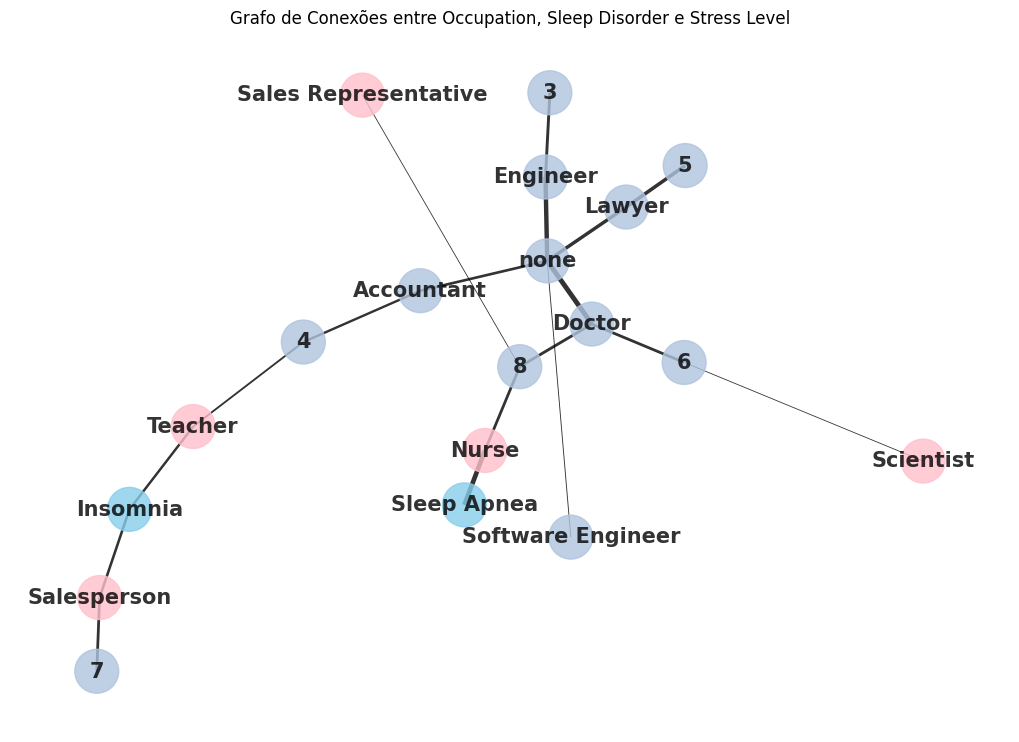

In [12]:
#Grafo da arvores maxima de ocupation, stress e disorder
G = nx.Graph()

edges_ocupation_stress_count = {}
edges_ocupation_disoder_count = {}

edges = list(zip(dataBase['Occupation'], dataBase['Stress Level']))
edges += list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))

G.add_nodes_from(dataBase['Stress Level'])
G.add_nodes_from(dataBase['Occupation'])
G.add_nodes_from(dataBase['Sleep Disorder'])

for edge in zip(dataBase['Occupation'], dataBase['Stress Level']):
    edges_ocupation_stress_count[edge] = edges_ocupation_stress_count.get(edge, 0) + 1

for edge in zip(dataBase['Occupation'], dataBase['Sleep Disorder']):
    edges_ocupation_disoder_count[edge] = edges_ocupation_disoder_count.get(edge, 0) + 1

for edge, count in edges_ocupation_stress_count.items():
    G.add_edge(edge[0], edge[1], weight=count)

for edge, count in edges_ocupation_disoder_count.items():
    G.add_edge(edge[0], edge[1], weight=count)

tree = nx.maximum_spanning_tree(G)

edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [0.5 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(10, 7))

node_colors = []

for node in G.nodes():
    if node in ['Nurse', 'Teacher', 'Salesperson', 'Sales Representative', 'Scientist']:
        node_colors.append('pink')
    elif node in ['Insomnia', 'Sleep Apnea', 'None']:
        node_colors.append('skyblue')
    else:
        node_colors.append('lightsteelblue')

pos = nx.spring_layout(tree, k=0.5)
nx.draw(tree, pos, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Stress Level')
plt.show()


In [ ]:
#retirando dados do csv
import pandas as pd

file_path = '/content/SemPressaoBaixa5.csv'
data = pd.read_csv(file_path)

data = data[data['Blood Pressure'] != '118/75']

new_file_path = 'SemPressaoBaixa6.csv'
data.to_csv(new_file_path, index=False)
